In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Datos.xlsx", sheet_name="Sheet1", index_col="Id")
df

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
Id,,,,,,,,,
1,2020,Data Scientist,MI,FT,6352272,DE,DE,L,0
2,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,S,0
3,2020,Big Data Engineer,SE,FT,8674985,GB,GB,M,50
4,2020,Product Data Analyst,MI,FT,1591390,HN,HN,S,0
5,2020,Machine Learning Engineer,SE,FT,11935425,US,US,L,50
...,...,...,...,...,...,...,...,...,...
603,2022,Data Engineer,SE,FT,12253703,US,US,M,100
604,2022,Data Engineer,SE,FT,10025757,US,US,M,100
605,2022,Data Analyst,SE,FT,10264466,US,US,M,0


*Comprobando el tipo de datos del df*

In [3]:
df.dtypes

Working_Year             int64
Designation             object
Experience              object
Employment_Status       object
Salary_In_Rupees         int64
Employee_Location       object
Company_Location        object
Company_Size            object
Remote_Working_Ratio     int64
dtype: object

*Convirtiendo Working_Year a String*

In [3]:
df["Working_Year"] = df["Working_Year"].astype(str)

*Primero se crea una variable que agrupe el df por Designation, posteriormente se procede a graficar*

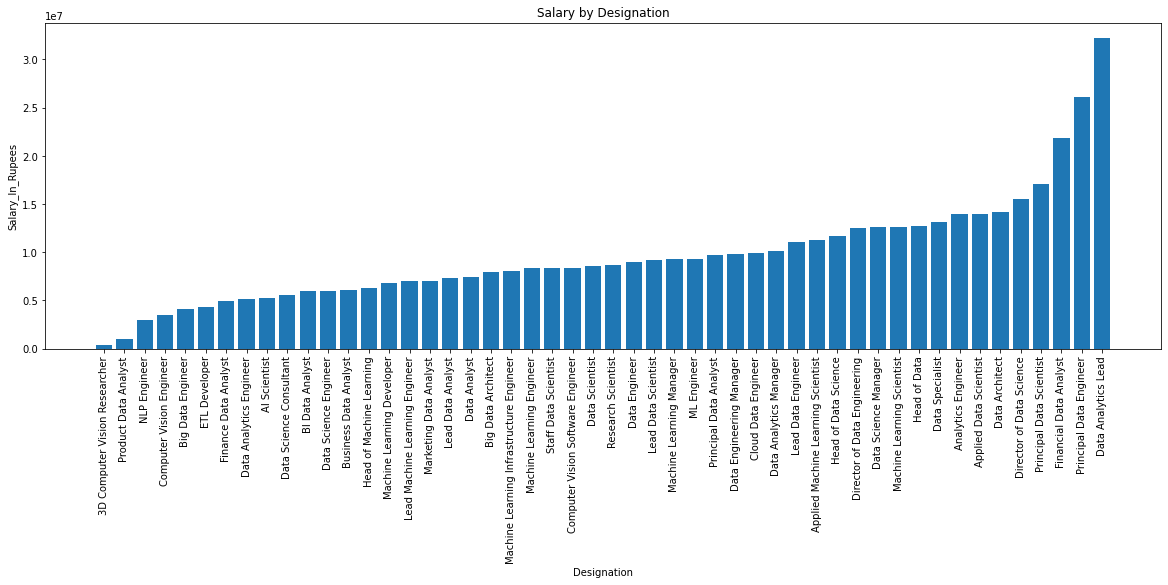

In [4]:
Agrupacion_Ocupacion = df.groupby("Designation").mean().sort_values("Salary_In_Rupees")
plt.figure(figsize=(20, 6))
plt.bar(Agrupacion_Ocupacion.index, Agrupacion_Ocupacion['Salary_In_Rupees'])
plt.xlabel('Designation')
plt.ylabel('Salary_In_Rupees')
plt.title('Salary by Designation')
plt.xticks(rotation=90)
plt.show()

*Se agrupa por Experience para analizar el salario*

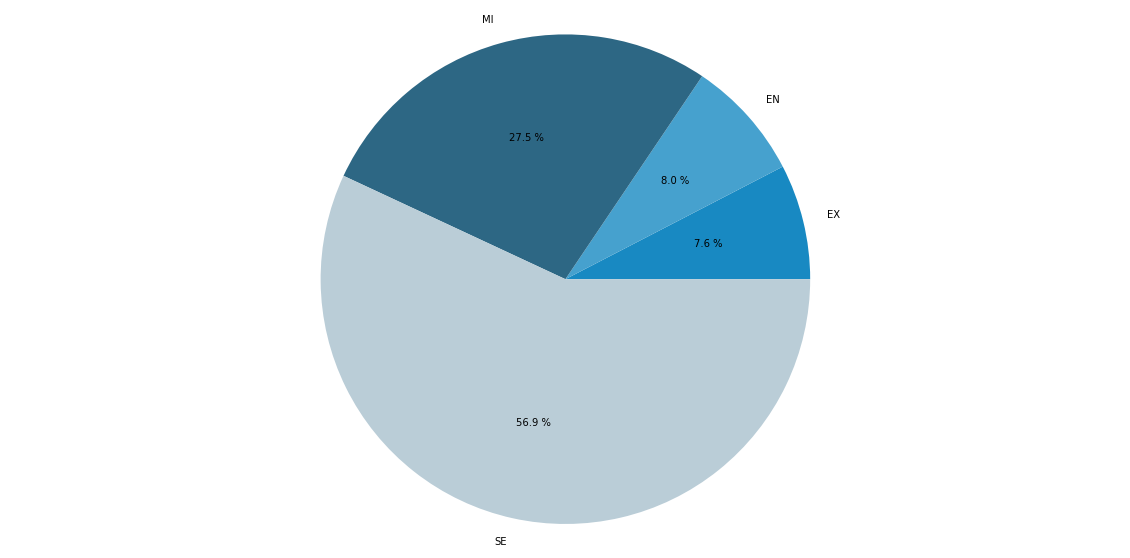

In [32]:
Experience_Group = round(df.groupby("Experience").sum().sort_values("Salary_In_Rupees"), 2)
Colors = ["#1889C2", "#46A1CE", "#2D6784", "#BACDD7"]
plt.figure(figsize=(20, 10))
plt.pie(Experience_Group["Salary_In_Rupees"], labels=Experience_Group.index, autopct="%0.1f %%", colors=Colors)
plt.axis("equal")
plt.show()

*Si Company_Size == "S" se asigna un valor de 1*
*Si Company_Size == "M" se asigna un valor de 2*
*Si Company_Size == "L" se asigna un valor de 3*

In [5]:
df["Company_Size"] = df["Company_Size"].replace({"S": 1, "M": 2, "L": 3})
df

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
Id,,,,,,,,,
1,2020,Data Scientist,MI,FT,6352272,DE,DE,3,0
2,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,1,0
3,2020,Big Data Engineer,SE,FT,8674985,GB,GB,2,50
4,2020,Product Data Analyst,MI,FT,1591390,HN,HN,1,0
5,2020,Machine Learning Engineer,SE,FT,11935425,US,US,3,50
...,...,...,...,...,...,...,...,...,...
603,2022,Data Engineer,SE,FT,12253703,US,US,2,100
604,2022,Data Engineer,SE,FT,10025757,US,US,2,100
605,2022,Data Analyst,SE,FT,10264466,US,US,2,0


In [8]:
df["Employment_Status"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: Employment_Status, dtype: int64

*PT == 0, FT == 1, CT == 2 y FL == 3*

In [6]:
df["Employment_Status"] = df["Employment_Status"].replace({'PT': 0, 'FT': 1, 'CT': 2, 'FL': 3})
df

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
Id,,,,,,,,,
1,2020,Data Scientist,MI,1,6352272,DE,DE,3,0
2,2020,Machine Learning Scientist,SE,1,20688070,JP,JP,1,0
3,2020,Big Data Engineer,SE,1,8674985,GB,GB,2,50
4,2020,Product Data Analyst,MI,1,1591390,HN,HN,1,0
5,2020,Machine Learning Engineer,SE,1,11935425,US,US,3,50
...,...,...,...,...,...,...,...,...,...
603,2022,Data Engineer,SE,1,12253703,US,US,2,100
604,2022,Data Engineer,SE,1,10025757,US,US,2,100
605,2022,Data Analyst,SE,1,10264466,US,US,2,0


*Validando si se hicieron los cambios*

In [10]:
df["Employment_Status"].value_counts()

1    588
0     10
2      5
3      4
Name: Employment_Status, dtype: int64

In [11]:
df["Experience"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: Experience, dtype: int64

In [7]:
import random
df["Experience"] = round(df["Experience"].replace({"EN": random.uniform(0,1), "MI": random.uniform(2,3),
                                            "SE": random.uniform(4,6), "EX": random.uniform(6.5,9)}), 2)
df

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
Id,,,,,,,,,
1,2020,Data Scientist,2.77,1,6352272,DE,DE,3,0
2,2020,Machine Learning Scientist,5.39,1,20688070,JP,JP,1,0
3,2020,Big Data Engineer,5.39,1,8674985,GB,GB,2,50
4,2020,Product Data Analyst,2.77,1,1591390,HN,HN,1,0
5,2020,Machine Learning Engineer,5.39,1,11935425,US,US,3,50
...,...,...,...,...,...,...,...,...,...
603,2022,Data Engineer,5.39,1,12253703,US,US,2,100
604,2022,Data Engineer,5.39,1,10025757,US,US,2,100
605,2022,Data Analyst,5.39,1,10264466,US,US,2,0


*Creando la matriz de correlación*

In [8]:
df["Employment_Status"] = df["Employment_Status"].astype(int)
df.corr()

,Experience,Employment_Status,Salary_In_Rupees,Company_Size,Remote_Working_Ratio
Experience,1.000000,0.077032,0.490445,0.058867,0.101530
Employment_Status,0.077032,1.000000,0.065747,0.027133,0.015638
Salary_In_Rupees,0.490445,0.065747,1.000000,0.151205,0.132122
Company_Size,0.058867,0.027133,0.151205,1.000000,-0.022070
Remote_Working_Ratio,0.101530,0.015638,0.132122,-0.022070,1.000000


*Visualizando los resultados de la matriz de correlación*

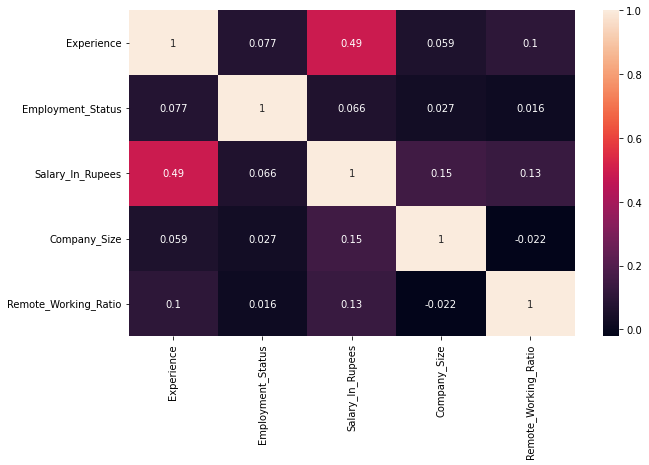

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

*Validando si hay valores nulos*

In [15]:
missing_values = df['Employment_Status'].isna().sum()
print(f"Number of missing values in Employment_Status column: {missing_values}")

Number of missing values in Employment_Status column: 0


*Se procede a exportar el nuevo df para hacer análisis de regresiones en los proximos ejercicios*

In [13]:
Archivo = "Salarios de analistas de datos.csv"
df.to_csv(Archivo, index=False)